# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = ''

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [9]:
# 新增欄位 "equal_width_DAYS_BIRTH", 對DAYS_BIRTH做等寬劃分
app_train["equal_width_DAYS_BIRTH"] = pd.cut(app_train['DAYS_BIRTH'], 4)

# 觀察等寬劃分下, 每個種組距各出現幾次
app_train["equal_width_DAYS_BIRTH"].value_counts()

(11924.0, 16359.0]    100808
(16359.0, 20794.0]     84685
(7471.26, 11924.0]     66536
(20794.0, 25229.0]     55482
Name: equal_width_DAYS_BIRTH, dtype: int64

In [10]:
# 新增欄位 "equal_freq_DAYS_BIRTH", 對DAYS_BIRTH做等頻劃分
app_train["equal_freq_DAYS_BIRTH"] = pd.qcut(app_train['DAYS_BIRTH'], 4)

# 觀察等頻劃分下, 每個種組距各出現幾次
app_train["equal_freq_DAYS_BIRTH"].value_counts()

(15750.0, 19682.0]     76887
(7488.999, 12413.0]    76884
(12413.0, 15750.0]     76877
(19682.0, 25229.0]     76863
Name: equal_freq_DAYS_BIRTH, dtype: int64

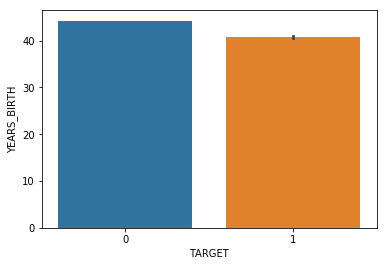

In [13]:
#將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
#宣告一個 age_data 將原本 dataframe的 TARGET & DAYS_BIRTH 欄位資料經過離散化後,轉存入TARGET & YEARS_BIRTH
age_data = pd.DataFrame({"TARGET":app_train['TARGET'],"YEARS_BIRTH": app_train['DAYS_BIRTH']/365})

import seaborn as sns # 另一個繪圖-樣式套件
px = age_data['TARGET']
py = age_data['YEARS_BIRTH']
sns.barplot(px, py)


[Interval(20.0, 25.0, closed='right') Interval(25.0, 30.0, closed='right')
 Interval(30.0, 35.0, closed='right') Interval(35.0, 40.0, closed='right')
 Interval(40.0, 45.0, closed='right') Interval(45.0, 50.0, closed='right')
 Interval(50.0, 55.0, closed='right') Interval(55.0, 60.0, closed='right')
 Interval(60.0, 65.0, closed='right') Interval(65.0, 70.0, closed='right')]


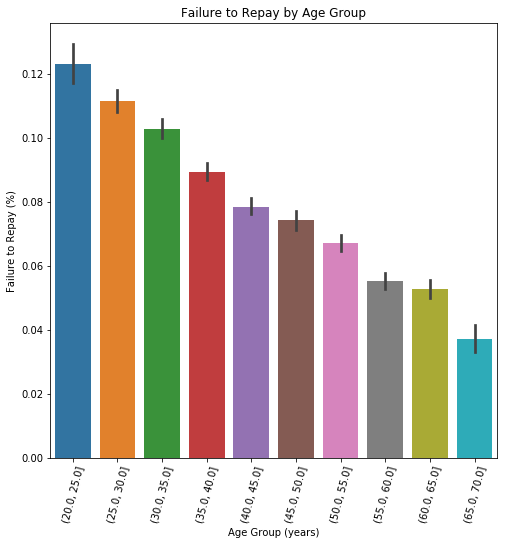

In [16]:
#將年齡資料用cut區間分開
bin_cut =  np.linspace(20, 70, num = 11)

#使用cut函數,將資料依據 bin的區間分類
#ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32, 101]
#bins = [18, 25, 35, 60, 100]
#cats = pd.cut(ages, bins)

age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = bin_cut)

#將重複的資料取ˇ其一
year_group_sorted = np.sort(age_data['YEARS_BINNED'].unique())
print(year_group_sorted)


plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = age_data['YEARS_BINNED']
py = age_data['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');